In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bikes.csv",parse_dates=['dteday'],header=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df_dates=pd.DataFrame()

In [6]:
df_dates['month']=df['dteday'].dt.month_name()
df_dates['year']=df['dteday'].dt.year
df_dates['day']=df['dteday'].dt.day_name()
df_dates['cnt']=df['cnt']
df_dates

,month,year,day,cnt
0,January,2011,Saturday,985
1,January,2011,Sunday,801
2,January,2011,Monday,1349
3,January,2011,Tuesday,1562
4,January,2011,Wednesday,1600
...,...,...,...,...
726,December,2012,Thursday,2114
727,December,2012,Friday,3095
728,December,2012,Saturday,1341
729,December,2012,Sunday,1796


In [7]:
df_dates['year'].drop_duplicates()

0      2011
365    2012
Name: year, dtype: int64

In [8]:
df_dates['type_of_the_day']=np.where((df_dates['day']=='Sunday')|(df_dates['day']=='Saturday'),"weekend","weekday")

In [9]:
df_dates

,month,year,day,cnt,type_of_the_day
0,January,2011,Saturday,985,weekend
1,January,2011,Sunday,801,weekend
2,January,2011,Monday,1349,weekday
3,January,2011,Tuesday,1562,weekday
4,January,2011,Wednesday,1600,weekday
...,...,...,...,...,...
726,December,2012,Thursday,2114,weekday
727,December,2012,Friday,3095,weekday
728,December,2012,Saturday,1341,weekend
729,December,2012,Sunday,1796,weekend


DATA VISUALISATION

<AxesSubplot:xlabel='type_of_the_day', ylabel='cnt'>

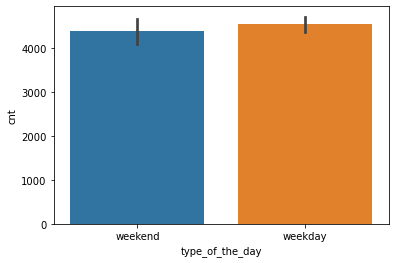

In [10]:
sns.barplot(x="type_of_the_day",y='cnt',data=df_dates)

<AxesSubplot:xlabel='day', ylabel='cnt'>

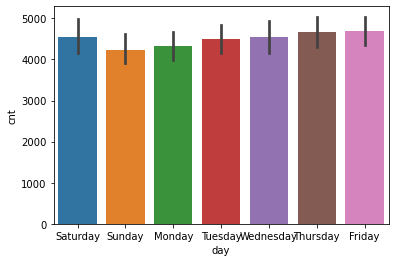

In [11]:
sns.barplot(x="day",y='cnt',data=df_dates)

<AxesSubplot:xlabel='month', ylabel='cnt'>

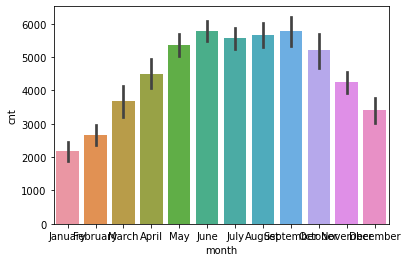

In [12]:
sns.barplot(x="month",y='cnt',data=df_dates)

<AxesSubplot:xlabel='temp', ylabel='cnt'>

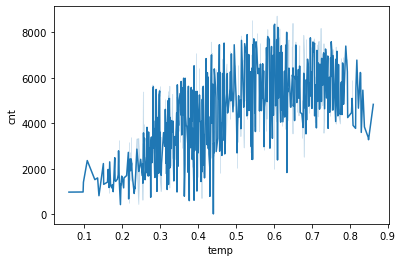

In [13]:
sns.lineplot(x='temp',y='cnt',data=df)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

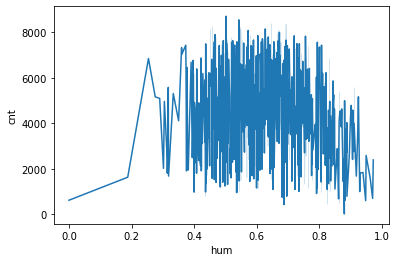

In [14]:
sns.lineplot(x='hum',y='cnt',data=df)

In [15]:
df.skew()

instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

In [16]:
df_x=df.drop(columns=['cnt','dteday','holiday','weekday','workingday','season','yr','mnth','weathersit','instant','casual','registered'])
y=pd.DataFrame(df['cnt'])

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [18]:
x.skew()

temp        -0.054521
atemp       -0.131088
hum         -0.069783
windspeed    0.677345
dtype: float64

TRAINING AND EVALUATING A MODEL

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is:",max_r_score)

r2_score corresponding to random state: 42 is: 0.4994717184081341
r2_score corresponding to random state: 43 is: 0.30835839832504675
r2_score corresponding to random state: 44 is: 0.3942197514479373
r2_score corresponding to random state: 45 is: 0.5076574853900531
r2_score corresponding to random state: 46 is: 0.5008982999754872
r2_score corresponding to random state: 47 is: 0.45239117296831166
r2_score corresponding to random state: 48 is: 0.3405355313010995
r2_score corresponding to random state: 49 is: 0.38753178047969483
r2_score corresponding to random state: 50 is: 0.32631584495777055
r2_score corresponding to random state: 51 is: 0.5176805109699404
r2_score corresponding to random state: 52 is: 0.47058794850936847
r2_score corresponding to random state: 53 is: 0.34376413214958024
r2_score corresponding to random state: 54 is: 0.4296405477357357
r2_score corresponding to random state: 55 is: 0.4734921397663371
r2_score corresponding to random state: 56 is: 0.44710475722424137
r2_

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=77,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print("r2_score is:",r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score is: 0.5523929359048002
RMSE is: 1282.5800553345564
